<a href="https://colab.research.google.com/github/sarincr/101-Sessions-on-Project-based-learning/blob/master/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance


In [20]:
import yfinance as yf

# Define Tesla ticker
tesla = yf.Ticker("TSLA")

# Get Tesla historical stock data
tesla_stock_data = tesla.history(period="max")

# Display the first few rows
tesla_stock_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [22]:
# Reset the index
tesla_stock_data.reset_index(inplace=True)

# Save to CSV
tesla_stock_data.to_csv("tesla_stock_data.csv", index=False)

# Display the first five rows
tesla_stock_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [25]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")

# Get revenue data from financials
tesla_revenue = tesla.financials.loc["Total Revenue"].to_frame()

# Display the last five rows
tesla_revenue.tail()


,Total Revenue
2024-12-31,97690000000.0
2023-12-31,96773000000.0
2022-12-31,81462000000.0
2021-12-31,53823000000.0
2020-12-31,NaN


In [26]:
# Download GameStop stock data
gme = yf.Ticker("GME")

# Get historical market data
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Save to CSV
gme_data.to_csv("gme_data.csv", index=False)

# Display the first five rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [29]:
import yfinance as yf

# Fetch GameStop data
gme = yf.Ticker("GME")

# Get revenue data (if available)
gme_revenue = gme.financials.loc["Total Revenue"]

# Convert to DataFrame
gme_revenue_df = gme_revenue.to_frame(name="Revenue")

# Display last five rows
gme_revenue_df.tail()


,Revenue
2024-01-31,5272800000.0
2023-01-31,5927200000.0
2022-01-31,6010700000.0
2021-01-31,5089800000.0


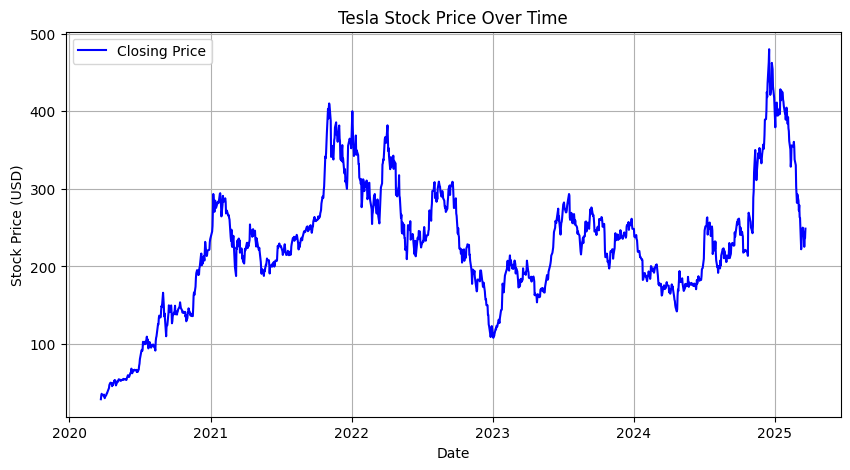

In [37]:
import matplotlib.pyplot as plt
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data["Close"], label="Closing Price", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="5y")  # Get last 5 years of data

# Call the function to make the graph
make_graph(tesla_data, "Tesla Stock Price Over Time")

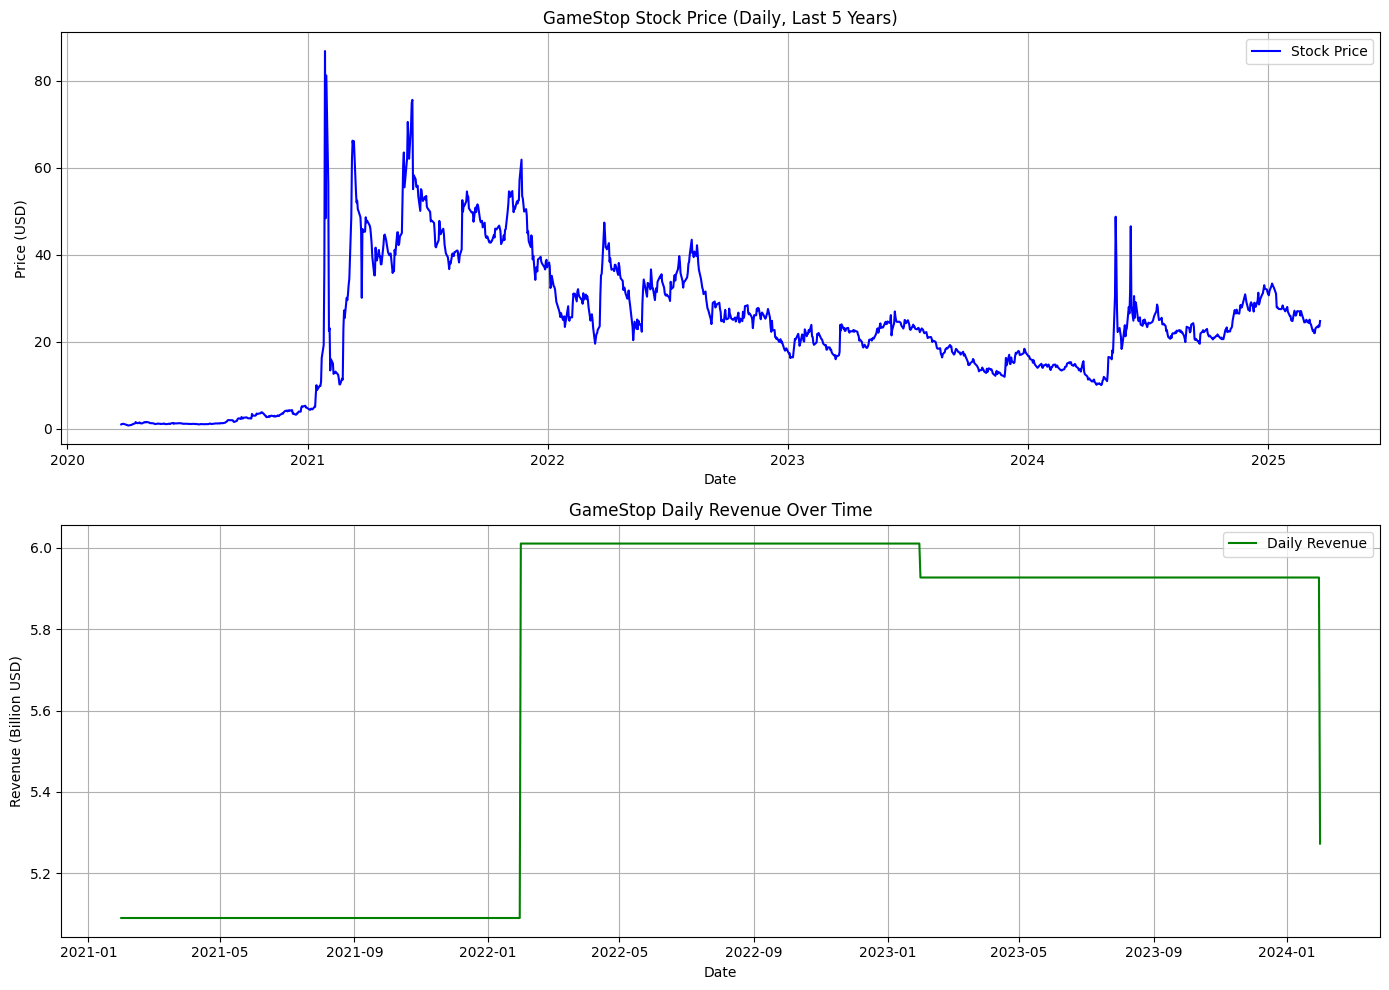

In [35]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch stock data
ticker = 'GME'
stock_data = yf.Ticker(ticker)

# Get historical stock prices (daily)
hist_stock_data = stock_data.history(period='5y')

# Get historical revenue (daily)
revenue_data = stock_data.income_stmt.T  # Get financial statement data
revenue_data = revenue_data['Total Revenue'].dropna()  # Extract revenue column & remove NaN
revenue_data = revenue_data.resample('D').ffill()  # Fill missing daily data with last known value

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot historical stock prices
ax[0].plot(hist_stock_data.index, hist_stock_data['Close'], label='Stock Price', color='blue')
ax[0].set_title('GameStop Stock Price (Daily, Last 5 Years)')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price (USD)')
ax[0].legend()
ax[0].grid(True)

# Plot historical revenue as a line graph (daily)
ax[1].plot(revenue_data.index, revenue_data.values / 1e9, label='Daily Revenue', color='green')
ax[1].set_title('GameStop Daily Revenue Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Revenue (Billion USD)')
ax[1].legend()
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
